#Medical Cost Personal Dataset

Can you accurately predict insurance costs?

![texto alternativo](https://drive.google.com/uc?id=1v_IeAS65KZ6ktlttDgFJh9MxZqnu_Ws_)

##Importar Datos

In [0]:
import pandas as pd

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Label Encoding

Algunas columnas se deben convertir a datos numericos

In [0]:
from sklearn import preprocessing

# sex

In [0]:

lSex= preprocessing.LabelEncoder() 
lSex = lSex.fit(df['sex'])
df['sex'] = lSex.transform(df['sex'])

In [8]:
df['sex'].value_counts() # mujer=0, man=1

1    676
0    662
Name: sex, dtype: int64

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
Sex_mapeado = dict(zip(lSex.classes_, lSex.transform(lSex.classes_)))
print(Sex_mapeado)

{'female': 0, 'male': 1}


# Smoker

In [0]:
lsmoker= preprocessing.LabelEncoder() 
lsmoker = lsmoker.fit(df['smoker'])
df['smoker'] = lsmoker.transform(df['smoker'])

In [14]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
lsmoker_mapeado = dict(zip(lsmoker.classes_, lsmoker.transform(lsmoker.classes_)))
print(lsmoker_mapeado)

{'no': 0, 'yes': 1}


# Region

In [0]:
lregion= preprocessing.LabelEncoder() 
lregion = lregion.fit(df['region'])
df['region'] = lregion.transform(df['region'])

In [18]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [20]:
lregion_mapeado = dict(zip(lregion.classes_, lregion.transform(lregion.classes_)))
print(lregion_mapeado)

{'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


##Detección de Outliers

Gráfique un boxplot de los datos del dataset

### boxplot

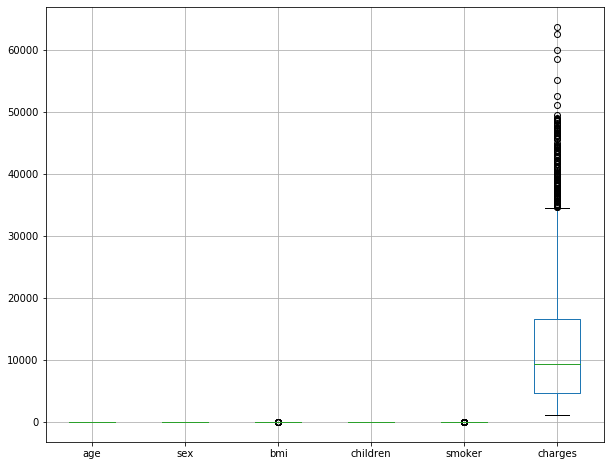

In [22]:
df.drop("region",axis=1).boxplot(figsize=(10,8))


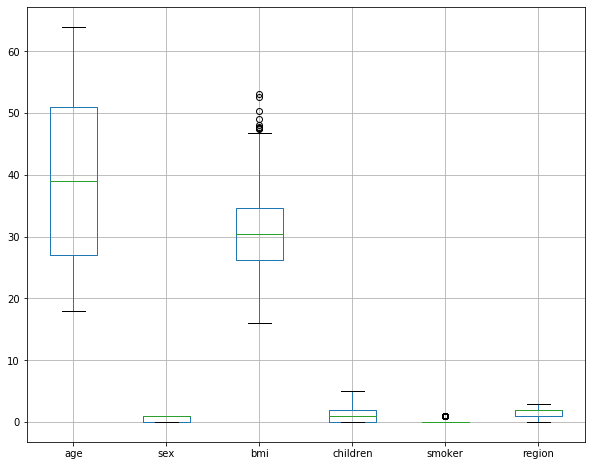

In [23]:
df.drop("charges",axis=1).boxplot(figsize=(10,8))


###IRQ

Solo una columna presenta outliers, halle su IRQ y halle el tamaño del dataframe modificado

In [24]:
# IRQ
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age            24.000000
sex             1.000000
bmi             8.397500
children        2.000000
smoker          0.000000
region          1.000000
charges     11899.625365
dtype: float64


In [0]:
df_modificado = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [26]:
# AL INICIO ES:
df.shape


(1338, 7)

In [27]:
# MODIFICADO
df_modificado.shape

(1055, 7)

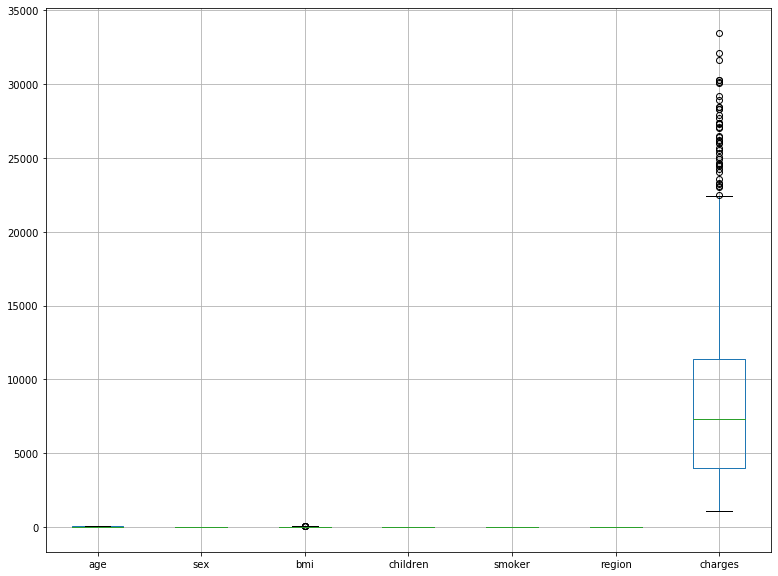

In [28]:
df_modificado.boxplot(figsize=(13,10))

###Z-Score

Utilice el método Z-Score para eliminar outliers y halle el tamaño del dataframe modificado

In [0]:
# TRABAJAR CON LA DATA INICIAL
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [0]:

df_z = df[(z < 3).all(axis=1)]

In [31]:
# DATA MODIFICADA 
df_z.shape

(1309, 7)

In [32]:
# DATA INICIAL
df.shape

(1338, 7)

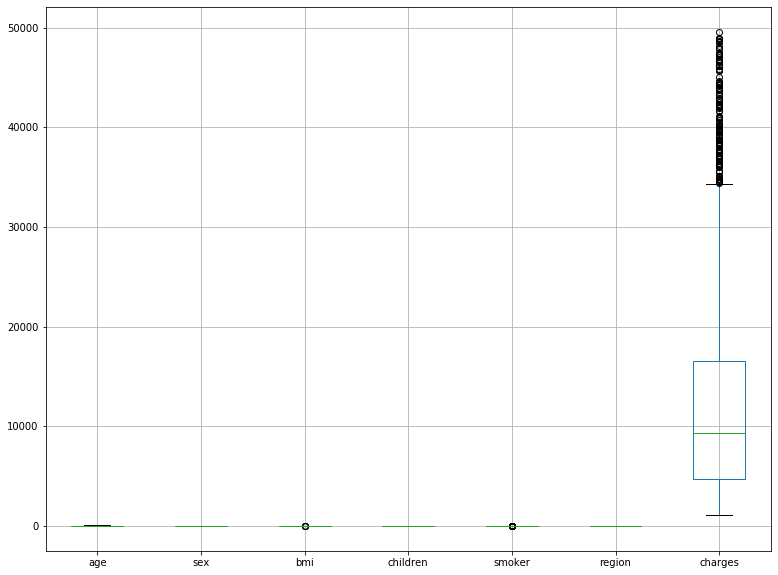

In [33]:
df_z.boxplot(figsize=(13,10))

##Separar Data

Separe la data en X - y y luego en Data train y Data test

In [0]:
X = df_z.drop('charges',axis = 1)
y = df_z['charges']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 2)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (1047, 6)
X_test shape: (262, 6)


### -estandarizar

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

##Elección del mejor método

Evaluaremos los 3 dataframes para regresión lineal modificando el X para hallar la mejor opción por medio del cross validation, ¿Cúal resultó con mejor score?

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

In [0]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  
  reg = LinearRegression()
  reg.fit(X_train_cv,y_train_cv)

  AccFolder = reg.score(X_test_cv, y_test_cv)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Una vez elegimos nuestro método, entrenaremos nuestra regresión lineal

##Estandarizar los datos

Para realizar un modelo de regresión lineal es recomendable estandarizar los datos

##Regresión Lineal

Realice la regresión lineal y halle el score de train y test

###Analizando la regresión lineal

Halle los coeficientes y el intercepto de la regresión lineal, ¿Cúal seria la formula?

Grafique diagramas de dispersión de relaciones entre las variables con la ayuda de la librería seaborn y la funcion pairplot

##KNN Regresion

Para trabajar con KNN es recomendable normalizar la data

###Normalizar Data

###Hallando el mejor K



Buscar el mejor método y métrica para obtener el mayor score, anotar para cada uno con el mejor K (n_neighbors).


1.   weights: **uniform** ->
2.   weights: **distance** metric: **euclidean** ->
3.   weights: **distance** metric: **manhattan** ->
4.   weights: **distance** metric: **cosine** ->
5.   weights: **distance** metric: **minkowski** ->








In [0]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=11,weights='distance',metric='euclidean')
neigh.fit(X_train, y_train)

In [0]:
neigh.score(X_test,y_test)

In [0]:
max_depth_range = list(range(2, 15))
accuracy_KNN = []
for depth in max_depth_range:
    neigh = KNeighborsRegressor(n_neighbors=depth,weights='distance',metric='euclidean') #Cambiar aquí
    neigh.fit(X_train, y_train)  
    score = neigh.score(X_test, y_test)
    
    accuracy_KNN.append(score)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(accuracy_KNN)
plt.xticks(list(range(len(max_depth_range))),max_depth_range)
plt.grid()
plt.show()

##KNN Regression - Cross Validation

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [0]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

In [0]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  
  neigh = KNeighborsRegressor(n_neighbors=3,weights='distance',metric='euclidean') #Cambiar aqui
  neigh.fit(X_train_cv, y_train_cv)

  AccFolder = neigh.score(X_test_cv, y_test_cv)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

##KNN Regression vs Linear Regression

Existen otras métricas de comparación para las regresiones, puede encontrarlas en el siguiente link:
[texto del enlace](http://sitiobigdata.com/2018/08/27/machine-learning-metricas-regresion-mse/)

###¿Cúal método de predicción vamos a utilizar para esta Data? ¿KNN o Regresión Lineal? ¿Por qué?